# Ondas gravitacionales
### ¿Qué son?
Las ondas gravitacionales son oscilaciones en el calpo gravitacional. Al igual que el movimiento acelerado de cargas electricas o imanes prodicen ondas electromagnéticas, el movimiento acelerado de masas produce ondas gravitacionales (las cuales también se propagan a la velocidad de la luz).
Las ondas gravitacionales (GW por sus siglas en inglés) son una predicción de la teoría de la relatividad general de Einstein, la cual es una descripción geométrica de la gravedad. De acuerdo a la relatividad, objetos masivos deforman la geometría del espacio-tiempo. La influencia gravitacional surge cuando otros objetos se mueven sobre esta geometría deformada. Cuando un objeto masivo se mueve rápidamente de un lado a otro, produce ondas en esta geometría que se propagan lejos del objeto. Son estas ondas las que LIGO finalmente detectó.

In [33]:
from IPython.display import Image
from IPython.core.display import HTML 
Image(url= "https://media.springernature.com/full/springer-static/image/art%3A10.1038%2Fs41586-019-1129-z/MediaObjects/41586_2019_1129_Fig1_HTML.png", width=950, height=1000)

### ¿Cómo se miden?


Se utiliza uninterferómetro láser para medir la curvatura oscilantoria del espacio-tiempo a medida que el GW pasa por la Tierra.
El interferómetro de LIGO es un dispositivo en forma de L, con espejos suspendidos en los extremos de cada "brazo" de la "L". La luz láser rebota dentro de estas cavidades y mide las pequeñas diferencias en su longitud a medida que una onda gravitacional encoge un brazo y estira el otro.
La primera detección ocurrió el 14 de septiembre de 2015.
La clave observable para LIGO es la tensión, la diferencia fraccional entre el cambio en la longitud de los dos brazos del interferómetro. (El GW provoca un cambio de longitud en cada "brazo" de un detector de GW; La señal del interferómetro es la diferencia entre los cambios de longitud en los dos brazos separados. Al dividir esta diferencia entre los 4 km de longitud de los brazos, se obtiene la tensión h (t)). 
La onda gravitacional que se detectó produjo una tensión máxima de $10^{-21}$. Esta es una señal muy pequeña. Otras influencias en el medio ambiente o en el detector en sí ocasionarán regularmente tensiones mucho más grandes.
-     LIGO hizo la primera observación de dos agujeros negros "merging" en conjuto.
- Los agujeros negros tenían una masa de 29 y 36 masas solares, formando un solo agujero negro de 62 masas solares. Los remanentes  del agujero negro gira a una velocidad de 100 rotaciones por segundo.
- El "merger" de los agujeros negros pasó hace 1.3 billones de años. 
- El evento se observó en ambos detectores LIGO con una compensación de tiempo de 7 milisegundos.
- La señal es completamente consistente con las predicciones de la relatividad general y concuerda bien con las predicciones de los cálculos numéricos que modelan la fusión de dos agujeros negros. Esta es la primera vez que se prueba la relatividad general en condiciones de gravedad extremadamente fuerte. La relatividad general ha pasado todas las pruebas experimentales a las que ha sido sometida!!!!!!

In [70]:
Image(url= "https://www.soundsofspacetime.org/uploads/4/9/0/4/49047375/4318342_orig.jpg", width=950, height=1000)

In [1]:
import numpy as np
from scipy import signal
from scipy.interpolate import interp1d
from scipy.signal import butter, filtfilt, iirdesign, zpk2tf, freqz

# the ipython magic below must be commented out in the .py file, since it doesn't work.
%matplotlib inline
%config InlineBackend.figure_format = 'retina'
import matplotlib.pyplot as plt
import matplotlib.mlab as mlab
import h5py

# LIGO-specific readligo.py 
import readligo as rl

In [3]:
!wget https://losc.ligo.org/s/events/GW150914/H-H1_LOSC_4_V1-1126259446-32.hdf5

--2019-11-23 00:20:05--  https://losc.ligo.org/s/events/GW150914/H-H1_LOSC_4_V1-1126259446-32.hdf5
Resolving losc.ligo.org (losc.ligo.org)... 131.215.113.73
Connecting to losc.ligo.org (losc.ligo.org)|131.215.113.73|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://www.gw-openscience.org/s/events/GW150914/H-H1_LOSC_4_V1-1126259446-32.hdf5 [following]
--2019-11-23 00:20:06--  https://www.gw-openscience.org/s/events/GW150914/H-H1_LOSC_4_V1-1126259446-32.hdf5
Resolving www.gw-openscience.org (www.gw-openscience.org)... 131.215.113.73
Connecting to www.gw-openscience.org (www.gw-openscience.org)|131.215.113.73|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1036463 (1012K)
Saving to: ‘H-H1_LOSC_4_V1-1126259446-32.hdf5’

H-H1_LOSC_4_V1-1126 100%[===================>]   1012K  1.58MB/s    in 0.6s    

2019-11-23 00:20:07 (1.58 MB/s) - ‘H-H1_LOSC_4_V1-1126259446-32.hdf5’ saved [1036463/1036463]



In [4]:
!wget https://losc.ligo.org/s/events/GW150914/L-L1_LOSC_4_V1-1126259446-32.hdf5

--2019-11-23 00:20:43--  https://losc.ligo.org/s/events/GW150914/L-L1_LOSC_4_V1-1126259446-32.hdf5
Resolving losc.ligo.org (losc.ligo.org)... 131.215.113.73
Connecting to losc.ligo.org (losc.ligo.org)|131.215.113.73|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://www.gw-openscience.org/s/events/GW150914/L-L1_LOSC_4_V1-1126259446-32.hdf5 [following]
--2019-11-23 00:20:43--  https://www.gw-openscience.org/s/events/GW150914/L-L1_LOSC_4_V1-1126259446-32.hdf5
Resolving www.gw-openscience.org (www.gw-openscience.org)... 131.215.113.73
Connecting to www.gw-openscience.org (www.gw-openscience.org)|131.215.113.73|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 994831 (972K)
Saving to: ‘L-L1_LOSC_4_V1-1126259446-32.hdf5’

L-L1_LOSC_4_V1-1126 100%[===================>] 971.51K  1.55MB/s    in 0.6s    

2019-11-23 00:20:44 (1.55 MB/s) - ‘L-L1_LOSC_4_V1-1126259446-32.hdf5’ saved [994831/994831]



In [5]:
#----------------------------------------------------------------
# Load LIGO data from a single file
#----------------------------------------------------------------
# First from H1
fn_H1 = 'H-H1_LOSC_4_V1-1126259446-32.hdf5'
strain_H1, time_H1, chan_dict_H1 = rl.loaddata(fn_H1, 'H1')
# and then from L1
fn_L1 = 'L-L1_LOSC_4_V1-1126259446-32.hdf5'
strain_L1, time_L1, chan_dict_L1 = rl.loaddata(fn_L1, 'L1')

# sampling rate:
fs = 4096#segundos que dura la señal
# both H1 and L1 will have the same time vector, so:
time = time_H1
# the time sample interval
dt = time[1] - time[0]

/home/atarockz/miniconda3/envs/py37/lib/python3.7/site-packages/h5py/_hl/dataset.py:313: H5pyDeprecationWarning: dataset.value has been deprecated. Use dataset[()] instead.
  "Use dataset[()] instead.", H5pyDeprecationWarning)


In [17]:
print(strain_H1,time_H1)

[2.26386630e-19 2.45062539e-19 2.60734924e-19 ... 4.42571750e-20
 7.28690972e-20 7.00518869e-20] [1.12625945e+09 1.12625945e+09 1.12625945e+09 ... 1.12625948e+09
 1.12625948e+09 1.12625948e+09]


In [6]:
#This NR template corresponds to the signal expected from a pair of black holes with masses of around 36 and 29 solar masses, 
#merging into a single black hole of 62 solar masses, at a distance of around 410 Mpc
!wget https://losc.ligo.org/s/events/GW150914/GW150914_4_NR_waveform.txt

--2019-11-23 00:21:29--  https://losc.ligo.org/s/events/GW150914/GW150914_4_NR_waveform.txt
Resolving losc.ligo.org (losc.ligo.org)... 131.215.113.73
Connecting to losc.ligo.org (losc.ligo.org)|131.215.113.73|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://www.gw-openscience.org/s/events/GW150914/GW150914_4_NR_waveform.txt [following]
--2019-11-23 00:21:29--  https://www.gw-openscience.org/s/events/GW150914/GW150914_4_NR_waveform.txt
Resolving www.gw-openscience.org (www.gw-openscience.org)... 131.215.113.73
Connecting to www.gw-openscience.org (www.gw-openscience.org)|131.215.113.73|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 142345 (139K) [text/plain]
Saving to: ‘GW150914_4_NR_waveform.txt’

GW150914_4_NR_wavef 100%[===================>] 139.01K   582KB/s    in 0.2s    

2019-11-23 00:21:30 (582 KB/s) - ‘GW150914_4_NR_waveform.txt’ saved [142345/142345]



In [18]:
print(NRtime, NR_H1)

[-0.62040411 -0.62015997 -0.61991583 ...  0.05488886  0.055133
  0.05537714] [-1.86912777e-22 -1.77827879e-22 -1.68582673e-22 ...  3.58407297e-26
  3.87926155e-26  4.05305739e-26]


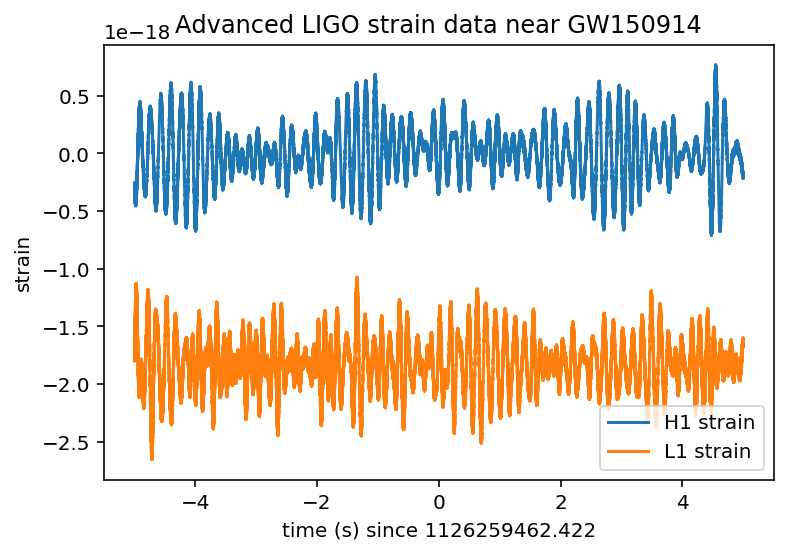

In [9]:
# plot +- 5 seconds around the event:
tevent = 1126259462.422         # Mon Sep 14 09:50:45 GMT 2015 
deltat = 5.                     # seconds around the event
# index into the strain time series for this time interval:
indxt = np.where((time_H1 >= tevent-deltat) & (time_H1 < tevent+deltat))

plt.figure()
plt.plot(time_H1[indxt]-tevent,strain_H1[indxt],label='H1 strain')
plt.plot(time_L1[indxt]-tevent,strain_L1[indxt],label='L1 strain')
plt.xlabel('time (s) since '+str(tevent))
plt.ylabel('strain')
plt.legend(loc='lower right')
plt.title('Advanced LIGO strain data near GW150914')
plt.savefig('GW150914_strain.png')

# "Limpiar" los datos
La densidades espectrales de amplitud (ASD) son la raíz cuadrada de las densidades espectrales de potencia (PSD), que son promedios del cuadrado de las transformadas rápidas de Fourier (FFT) de los datos.

Son una estimación del "ruido equivalente a la tensión" de los detectores frente a la frecuencia, lo que limita la capacidad de los detectores para identificar señales de las ondas gravitacionales.

Están en unidades de strain / rt (Hz). Entonces, si desea conocer el ruido de deformación de la raíz cuadrática media (rms) en una banda de frecuencia, integre (sume) los cuadrados del ASD sobre esa banda, luego tome la raíz cuadrada.

In [19]:
# number of sample for the fast fourier transform:
NFFT = 1*fs
fmin = 10
fmax = 2000
Pxx_H1, freqs = mlab.psd(strain_H1, Fs = fs, NFFT = NFFT)#Compute the power spectral density
Pxx_L1, freqs = mlab.psd(strain_L1, Fs = fs, NFFT = NFFT)

In [20]:
# We will use interpolations of the ASDs computed above for whitening:
psd_H1 = interp1d(freqs, Pxx_H1)
psd_L1 = interp1d(freqs, Pxx_L1)

Text(0.5, 1.0, 'Advanced LIGO strain data near GW150914')

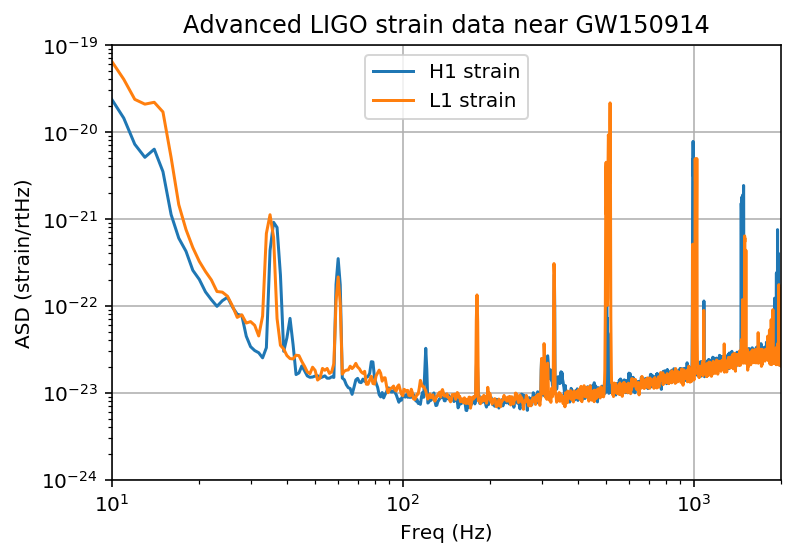

In [21]:
# plot the ASDs(amplitude spectral density)
plt.figure()
plt.loglog(freqs, np.sqrt(Pxx_H1),label='H1 strain')
plt.loglog(freqs, np.sqrt(Pxx_L1),label='L1 strain')
plt.axis([fmin, fmax, 1e-24, 1e-19])
plt.grid('on')
plt.ylabel('ASD (strain/rtHz)')
plt.xlabel('Freq (Hz)')
plt.legend(loc='upper center')
plt.title('Advanced LIGO strain data near GW150914')
#plt.savefig('GW150914_ASDs.png')

Podemos "limpiar" los datos (dividiéndolos por el espectro de amplitud de ruido, en el dominio de Fourier), suprimiendo el ruido adicional a bajas frecuencias y en las líneas espectrales, para ver mejor las señales débiles en la banda más sensible.

El blanqueamiento es siempre uno de los primeros pasos en el análisis de datos astrofísicos (búsquedas, estimación de parámetros). El blanqueamiento no requiere conocimiento previo de líneas espectrales, etc. solo se necesitan los datos.

La serie temporal resultante ya no está en unidades de "strain"; ahora en unidades de "sigmas" lejos de la media.


In [22]:
# function to whiten data
def whiten(strain, interp_psd, dt):
    Nt = len(strain)
    freqs = np.fft.rfftfreq(Nt, dt)#Compute the one-dimensional discrete Fourier Transform for real input

    # whitening: transform to freq domain, divide by asd, then transform back, 
    # taking care to get normalization right.
    hf = np.fft.rfft(strain)
    white_hf = hf / (np.sqrt(interp_psd(freqs) /dt/2.))
    white_ht = np.fft.irfft(white_hf, n=Nt)
    return white_ht

In [23]:
# now whiten the data from H1 and L1, and also the NR template:
strain_H1_whiten = whiten(strain_H1,psd_H1,dt)
strain_L1_whiten = whiten(strain_L1,psd_L1,dt)
NR_H1_whiten = whiten(NR_H1,psd_H1,dt)

Ahora los datos limpiados en conjunto con el template de relatividad numérica.

Para eliminar el ruido de alta frecuencia restante, se hará un "bandpass" de los datos.

In [ ]:
# We need to suppress the high frequencies with some bandpassing:
bb, ab = butter(4, [20.*2./fs, 300.*2./fs], btype='band')#Butterworth digital and analog filter design.
strain_H1_whitenbp = filtfilt(bb, ab, strain_H1_whiten)#Apply a digital filter forward and backward to a signal.
strain_L1_whitenbp = filtfilt(bb, ab, strain_L1_whiten)
NR_H1_whitenbp = filtfilt(bb, ab, NR_H1_whiten)

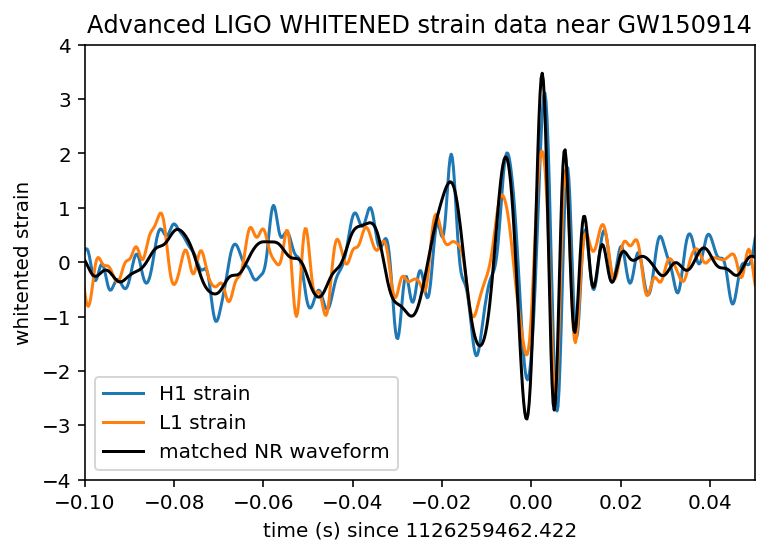

In [14]:
# plot the data after whitening:
# first, shift L1 by 7 ms, and invert. See the GW150914 detection paper for why!
strain_L1_shift = -np.roll(strain_L1_whitenbp,int(0.007*fs))

plt.figure()
plt.plot(time-tevent,strain_H1_whitenbp,label='H1 strain')
plt.plot(time-tevent,strain_L1_shift,label='L1 strain')
plt.plot(NRtime+0.002,NR_H1_whitenbp,'k',label='matched NR waveform')
plt.xlim([-0.1,0.05])
plt.ylim([-4,4])
plt.xlabel('time (s) since '+str(tevent))
plt.ylabel('whitented strain')
plt.legend(loc='lower left')
plt.title('Advanced LIGO WHITENED strain data near GW150914')
plt.savefig('GW150914_strain_whitened.png')

Se cambiaron los datos de L1 en 7 ms para que se alineen con los datos de H1, porque la fuente está aproximadamente en la dirección de la línea que conecta H1 a L1, y la onda viaja a la velocidad de la luz, por lo que golpea L1 7 ms antes. Además, la orientación de L1 con respecto a H1 significa que se tiene que voltear el signo de la señal en L1 para que coincida con la señal en H1.

# Archivos de sonido
## +-2s al rededor del evento

In [24]:
from scipy.io import wavfile

In [25]:
# function to keep the data within integer limits, and write to wavfile:
def write_wavfile(filename,fs,data):
    d = np.int16(data/np.max(np.abs(data)) * 32767 * 0.9)
    wavfile.write(filename,int(fs), d)

In [26]:
tevent = 1126259462.422         # Mon Sep 14 09:50:45 GMT 2015 
deltat = 2.                     # seconds around the event

In [27]:
# index into the strain time series for this time interval:
indxt = np.where((time >= tevent-deltat) & (time < tevent+deltat))

In [28]:
# write the files:
write_wavfile("GW150914_H1_whitenbp.wav",int(fs), strain_H1_whitenbp[indxt])
write_wavfile("GW150914_L1_whitenbp.wav",int(fs), strain_L1_whitenbp[indxt])
write_wavfile("GW150914_NR_whitenbp.wav",int(fs), NR_H1_whitenbp)

El siguiente código desplazará los datos hacia arriba en 400 Hz (tomando una FFT, cambiando / girando la serie de frecuencias, luego invirtiendo la función FFT). El archivo de sonido resultante será notablemente más agudo, y la señal será más fácil de escuchar.

In [29]:
# function that shifts frequency of a band-passed signal
def reqshift(data,fshift=100,sample_rate=4096):
    """Frequency shift the signal by constant
    """
    x = np.fft.rfft(data)
    T = len(data)/float(sample_rate)
    df = 1.0/T
    nbins = int(fshift/df)
    # print T,df,nbins,x.real.shape
    y = np.roll(x.real,nbins) + 1j*np.roll(x.imag,nbins)
    z = np.fft.irfft(y)
    return z

In [30]:
# parameters for frequency shift
fs = 4096
fshift = 400.
speedup = 1.
fss = int(float(fs)*float(speedup))

In [31]:
# shift frequency of the data
strain_H1_shifted = reqshift(strain_H1_whitenbp,fshift=fshift,sample_rate=fs)
strain_L1_shifted = reqshift(strain_L1_whitenbp,fshift=fshift,sample_rate=fs)
NR_H1_shifted = reqshift(NR_H1_whitenbp,fshift=fshift,sample_rate=fs)

In [32]:
# write the files:
write_wavfile("GW150914_H1_shifted.wav",int(fs), strain_H1_shifted[indxt])
write_wavfile("GW150914_L1_shifted.wav",int(fs), strain_L1_shifted[indxt])
write_wavfile("GW150914_NR_shifted.wav",int(fs), NR_H1_shifted)

In [34]:
from gwpy.timeseries import TimeSeries
import json

In [39]:
data_t = TimeSeries.fetch_open_data('L1', tevent-deltat, tevent+deltat)

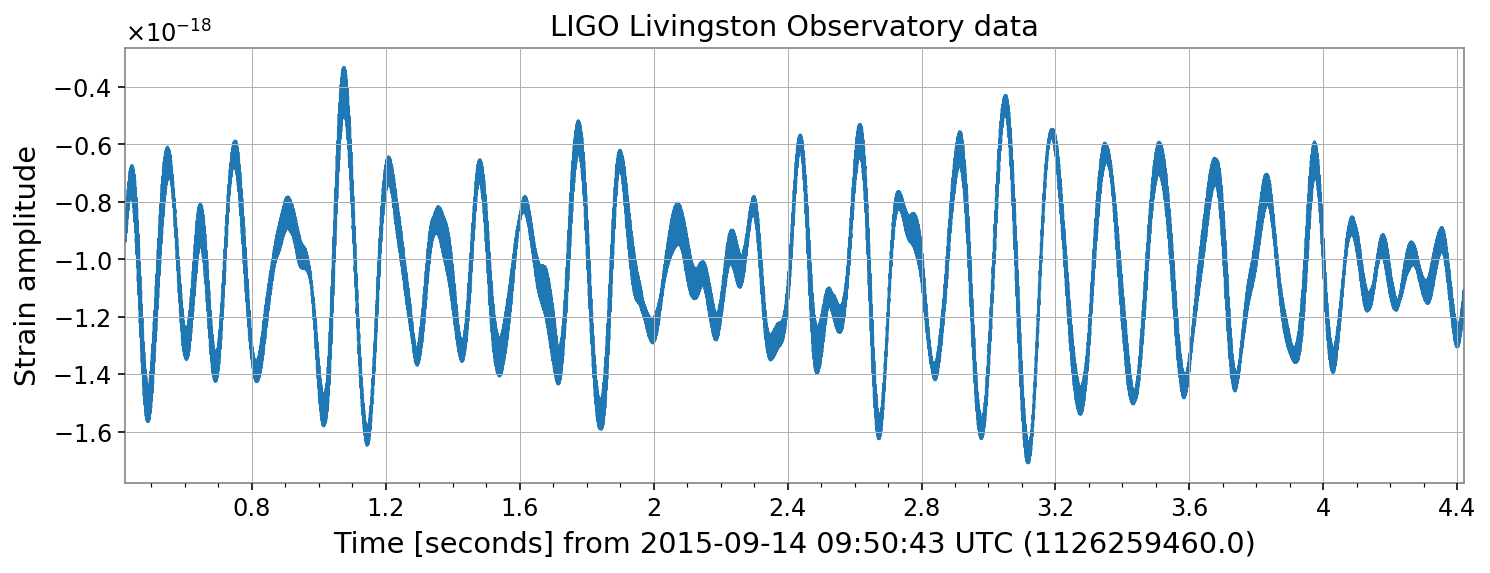

In [68]:
plot_t = data_t.plot(title='LIGO Livingston Observatory data',ylabel='Strain amplitude',)

/home/atarockz/miniconda3/envs/py37/lib/python3.7/site-packages/gwpy/types/series.py:926: UserWarning: TimeSeries.crop given end larger than current end, crop will end when the Series actually ends.
  % type(self).__name__)


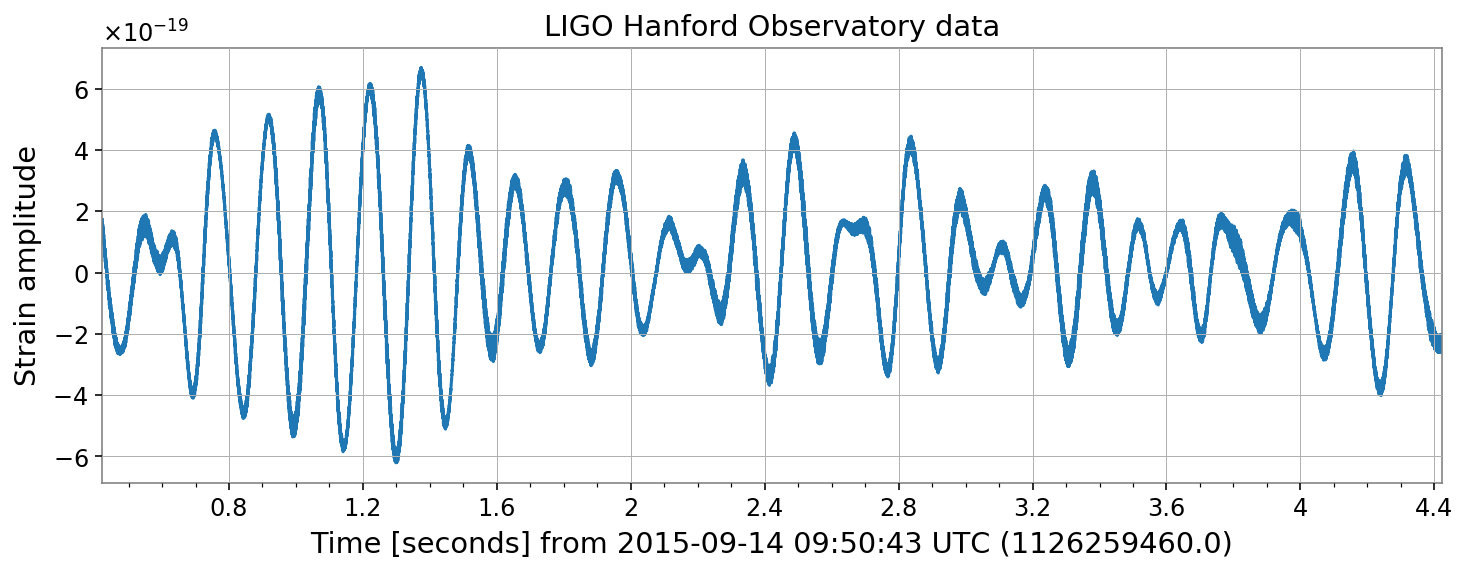

In [69]:
data_tH = TimeSeries.fetch_open_data('H1', tevent-deltat, tevent+deltat)
plot_tH = data_tH.plot(title='LIGO Hanford Observatory data',ylabel='Strain amplitude',)

In [ ]:
# -- Download JSON file
!wget 'https://www.gw-openscience.org/catalog/GWTC-1-confident/filelist/' -O 'filelist.json'

In [43]:
with open('filelist.json', 'r') as fn:
    jsonstr = fn.read()
    jsonDict = json.loads(jsonstr)

In [44]:
infodict = jsonDict['data']['GW150914']

In [45]:
infodict.keys()

dict_keys(['E_rad', 'L_peak', 'a_final', 'chi_eff', 'distance', 'far_cwb', 'far_gstlal', 'far_pycbc', 'files', 'mass1', 'mass2', 'mchirp', 'mfinal', 'redshift', 'sky_size', 'snr_cwb', 'snr_gstlal', 'snr_pycbc', 'tc', 'utctime'])

In [46]:
m1 = infodict['mass1']['best']#The mass of the first component object in the binary (in solar masses).
m2 = infodict['mass2']['best']#The mass of the second component object in the binary (in solar masses).
spin = infodict['chi_eff']['best']
distance = infodict['distance']['best']# Luminosity distance of the system
gps = infodict['tc']['best']#The GPS time of coalescence (should be geocentric time)
snr = infodict['snr_gstlal']['best']
apx = ['SEOBNRv2','SpinTaylorT2']#A string that indicates the chosen approximant
flow = 30# The starting frequency of the waveform (in Hz).
#delta_t: The time step used to generate the ringdown
#delta_f:  The frequency step used to generate the waveform (in Hz).
#f_final: The ending frequency of the waveform. The default (0) indicates that the choice is made by the respective approximant.

In [50]:
import pycbc
from pycbc.waveform import get_td_waveform

In [56]:
high = data_tH.highpass(15)#high pass filter at 15Hz
psd = high.psd(4, 2)#Power Spectra Density
zoom = high.crop(1126259460, 1126259464)#Crop this series to the given x-axis extent.

/home/atarockz/miniconda3/envs/py37/lib/python3.7/site-packages/gwpy/types/series.py:917: UserWarning: TimeSeries.crop given start smaller than current start, crop will begin when the Series actually starts.
  % type(self).__name__)


In [58]:
hp, hc = get_td_waveform(approximant='IMRPhenomD',mass1=m1,mass2=m2,spin1z=spin,delta_t=1.0/fs,distance = distance,f_lower=flow,f_final=2048,delta_f=psd.df.value)

In [59]:
start = hp.sample_times[0]
    
# -- Load waveforms into gwpy timeseries
gwpy_template = TimeSeries(hp)
gwpy_template.dt = 1.0/fs
gwpy_template.t0 = hp.sample_times[0]
    
# -- Taper waveform
template_taper = gwpy_template.taper()

(-0.1, 0.04)

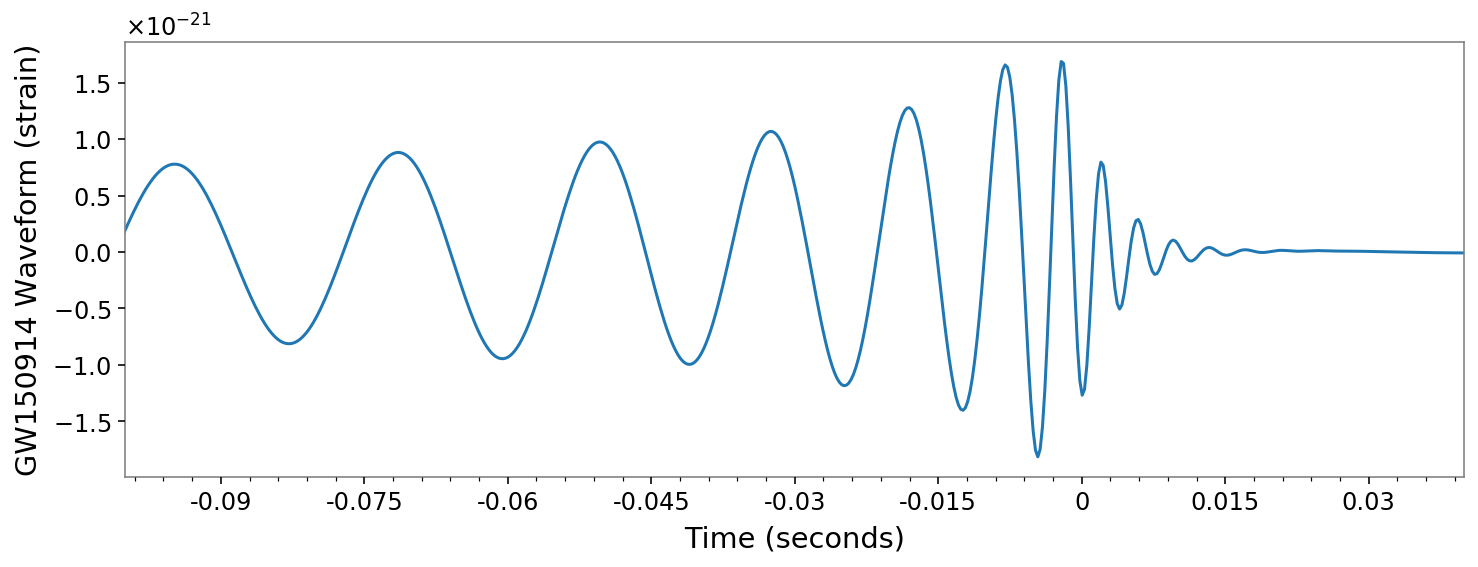

In [67]:
template_taper.plot()
#plt.plot(time-tevent,strain_H1_whitenbp,label='H1 strain')
#plt.plot(time-tevent,strain_L1_shift,label='L1 strain')
plt.grid(False)
plt.ylabel('GW150914' + ' Waveform (strain)')
plt.xlabel('Time (seconds)')
plt.xlim(-0.1,0.04)

Este notebook está basado en
- https://www.soundsofspacetime.org/
- https://www.gw-openscience.org/GW150914data/GW150914_tutorial.html
- https://www.gw-openscience.org/catalog/GWTC-1-confident/html/
- https://www.gw-openscience.org/audiogwtc1/